<a href="https://colab.research.google.com/github/jhseo01/github_test/blob/master/ML_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **보팅 앙상블**

라이브러리 import

In [ ]:
# 필요한 라이브러리 Import
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from lightgbm import LGBMClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
np.random.seed(5)

**데이터셋 로드 및 확인**

In [ ]:
# 데이터셋인 heart.csv를 로드 (구글 Driver내 파일 경로 지정)
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [ ]:
# 데이터셋의 크기 확인
print(data.shape)

(303, 14)


In [ ]:
# 데이터셋 컬럼 정보 확인
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
# 데이터셋의 첫 5줄의 내용 확인
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# 데이터셋의 Column, null 유무, 데이터 타입 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# 데이터셋 요약 정보 확인(데이터 개수(count), 평균(mean), 표준편차(std), 최소값(min), 상위 25,50,75%값, 최대값(max) 확인)
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# 독립변수 추출
data.iloc[:,:-1].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [ ]:
# 종속 변수 추출
data.iloc[:,-1:].head()

,target
0,1
1,1
2,1
3,1
4,1


In [ ]:
# null 유/무 확인
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**학습/테스트 데이터 나누기**

In [ ]:
x = data.drop(["target"], axis=1) # 종속변수(target)을 제외한 data를 x data로 지정
y = data["target"] # 종속변수(target)을 y data로 지정
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5) # 8:2로 train,test data 분리 
print(x)
print(y)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target

In [ ]:
# 평균 0 , 분산 1로 조정(스케일링 조정을 통한 오차를 줄이고 성능 향상 목적) 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) # test datasms fit을 하지 않음(train data와 기준 일치 목적)

**학습 및 예측(기본 파라미터)**

In [ ]:
# 각 모델별 학습/예측/confusion matrix, 정확도 추출용 함수 정의
def pred_acc_fc(model_name, model):
    model.fit(x_train, y_train) # 학습
    y_pred = model.predict(x_test)  # 예측
    cm = confusion_matrix(y_test, y_pred)  # confusion matrix
    acc = accuracy_score(y_test, y_pred)  # 정확도 계산
    print(model_name,'\n') # 모델 이름 출력
    print('confusion_matrix \n',cm) # confusion matrix 결과 출력
    print('accuracy_score: {0:.4f} \n'.format(acc)) #정확도 출력
    return acc

In [ ]:
# 모델 8개일때 hard/soft voting 함수 정의
def voting_8model_acc_fc(voting_mode, loreg, GNB, knn, clf_rf, clf_tree, clf_ada, lgbm, svm, weights=None): # 매개 변수로voting mode, model, weight를 전달
    voting_model = VotingClassifier(estimators=[
    ('LogisticRegression', loreg), ('GaussianNB', GNB), ('KNeighborsClassifier', knn), ('RandomForestClassifier',clf_rf),
    ('DecisionTreeClassifier',clf_tree),('AdaBoostClassifier',clf_ada),('LGBMClassifier',lgbm),('SVM',svm)], 
    weights=weights, voting=voting_mode) # voting classifier 선언 & 모델별 정확도 가중치 반영
    voting_model.fit(x_train, y_train) # x_train, y_train 데이터로 voting_model 학습
    voting_predicted = voting_model.predict(x_test) # voting_model을 통해 x_test 결과 예측
    acc = accuracy_score(y_test, voting_predicted) # 정확도 계산
    print(voting_mode,' accuracy_score: {0:.4f}'.format(acc)) # 해당 voting mode의 정확도 출력
    return acc # voting 정확도 return

In [ ]:
# 모델 6개일때 하드/소프트 보팅 함수 정의
def voting_6model_acc_fc(voting_mode, loreg, GNB, knn, clf_rf, lgbm, svm, weights=None): # 매개 변수로voting mode, model, weight를 전달
    voting_model = VotingClassifier(estimators=[
    ('LogisticRegression', loreg), ('GaussianNB', GNB), ('KNeighborsClassifier', knn), ('RandomForestClassifier',clf_rf),
   ('LGBMClassifier',lgbm),('SVM',svm)], 
    weights=weights, voting=voting_mode) # voting classifier 선언 & 모델별 정확도 가중치 반영
    voting_model.fit(x_train, y_train) # x_train, y_train 데이터로 voting_model 학습 
    voting_predicted = voting_model.predict(x_test) # voting_model을 통해 x_test 결과 예측
    acc = accuracy_score(y_test, voting_predicted) # 정확도 계산
    print(voting_mode,' accuracy_score: {0:.4f}'.format(acc)) # 해당 voting mode의 정확도 출력
    return acc # voting 정확도 return

In [ ]:
# 각 모델 생성 (기본 파라미터)
# 동일한 결과를 위해 random_state 설정)
loreg = LogisticRegression(random_state=5) 
GNB = GaussianNB()
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=5)
tree= DecisionTreeClassifier(random_state=5)
ada= AdaBoostClassifier(random_state=5)
lgbm = LGBMClassifier(random_state=5)
svm = SVC(probability=True, random_state=5) #앙상블시 probability=True로 해주어야 함

In [ ]:
# 학습/예측/confusion matrix, 정확도 추출용 함수 호출
loreg_acc = pred_acc_fc('[ LogisticRegression ]', loreg)
GNB_acc = pred_acc_fc('[ GaussianNB ]', GNB)
knn_acc = pred_acc_fc('[ KNeighborsClassifier ]', knn)
rf_acc = pred_acc_fc('[ RandomForestClassifier ]', rf)
tree_acc = pred_acc_fc('[ DecisionTreeClassifier ]', tree)
ada_acc= pred_acc_fc('[ AdaBoostClassifier ]', ada)
lgbm_acc = pred_acc_fc('[ LGBMClassifier ]', lgbm)
svm_acc = pred_acc_fc('[ SVM ]', svm)

[ LogisticRegression ] 

confusion_matrix 
 [[26  4]
 [ 3 28]]
accuracy_score: 0.8852 

[ GaussianNB ] 

confusion_matrix 
 [[26  4]
 [ 4 27]]
accuracy_score: 0.8689 

[ KNeighborsClassifier ] 

confusion_matrix 
 [[27  3]
 [ 5 26]]
accuracy_score: 0.8689 

[ RandomForestClassifier ] 

confusion_matrix 
 [[26  4]
 [ 2 29]]
accuracy_score: 0.9016 

[ DecisionTreeClassifier ] 

confusion_matrix 
 [[25  5]
 [ 5 26]]
accuracy_score: 0.8361 

[ AdaBoostClassifier ] 

confusion_matrix 
 [[25  5]
 [ 6 25]]
accuracy_score: 0.8197 

[ LGBMClassifier ] 

confusion_matrix 
 [[26  4]
 [ 4 27]]
accuracy_score: 0.8689 

[ SVM ] 

confusion_matrix 
 [[25  5]
 [ 4 27]]
accuracy_score: 0.8525 



In [ ]:
# 모델 6개일때 hard/soft voting 함수
vot6_hard_acc = voting_6model_acc_fc('hard' ,loreg, GNB, knn, rf, lgbm, svm, weights=[1,1,1,1,1,1]) #6개 모델 모두 동일한 weight에 반영
vot6_soft_acc = voting_6model_acc_fc('soft', loreg, GNB, knn, rf, lgbm, svm, weights=[1,1,1,1,1,1]) #6개 모델 모두 동일한 weight에 반영영

hard  accuracy_score: 0.9180
soft  accuracy_score: 0.9180


In [ ]:
# 모델 8개일때 hard/soft voting 함수 (성능이 낮은 모델 2개가 포함되어 soft voting시 6개일때보다 낮게 나옴 )
vot8_hard_acc = voting_8model_acc_fc('hard', loreg, GNB, knn, rf, tree, ada, lgbm, svm, weights=[1,1,1,1,1,1,1,1]) #6개 모델 모두 동일한 weight에 반영
vot8_soft_acc = voting_8model_acc_fc('soft', loreg, GNB, knn, rf, tree, ada, lgbm, svm, weights=[1,1,1,1,1,1,1,1]) #6개 모델 모두 동일한 weight에 반영

hard  accuracy_score: 0.9016
soft  accuracy_score: 0.8852


In [ ]:
# 각 모델 및 voting 결과를 시각화 함수 정의 (파라미터 적용 전/후 시각화)
def visualize_fc():
    x = np.arange(12) #model 갯수만큼 지정
    plt.rcParams["figure.figsize"] = (20,5)
    plt.bar(x, height= [loreg_acc,GNB_acc,knn_acc, rf_acc,tree_acc, ada_acc,lgbm_acc, svm_acc, vot6_hard_acc, vot6_soft_acc, vot8_hard_acc, vot8_soft_acc])
    plt.xticks(x, ['LogisticRegression','GNB','KNN','RandomForest','DecisionTree','AdaBoost','LGBM', 'SVM', 'vot6_hard', 'vot6_soft','vot8_hard', 'vot8_soft']); # x축 레이블 설정
    plt.title('[Model Accuracy]')

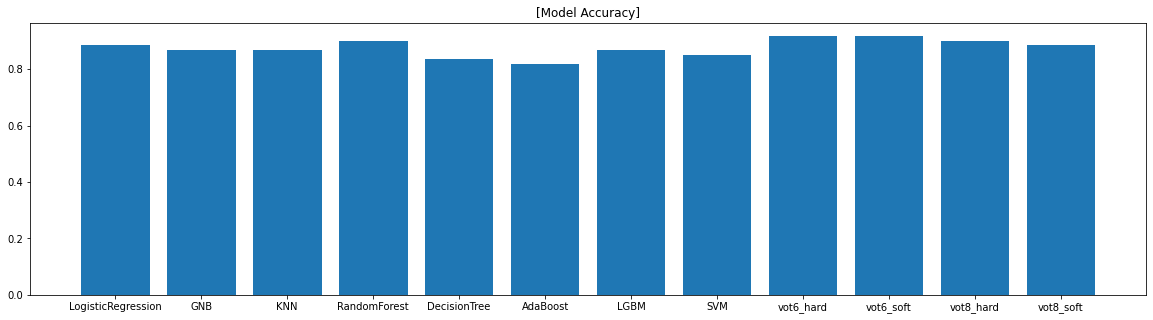

In [ ]:
# 각 모델 및 voting 결과를 시각화(하이퍼 파라미터 적용 전)
visualize_fc()

**학습 및 예측(파라미터 지정)**

In [ ]:
# 각 Model별 GridSearch를 위한 함수 정의
def GridSearchCV_df(parameters, estimator, cv):
    grid = GridSearchCV(cv=cv, estimator=estimator, param_grid=parameters, scoring='accuracy', verbose=1)
    grid.fit(x_train, y_train) # X_train_, y_train 데이터로 grid 학습
    print('최고 평균 정확도 : {0:.4f}'.format(grid.best_score_)) # grid의 best scroe를 출력
    print(grid.best_params_)  # grid의 best parameter 출력

In [ ]:
loreg_param_grid ={ 'C': [1, 3, 5, 7, 9, 11, 13]} # LogisticRegression Parameter List
GridSearchCV_df(loreg_param_grid, LogisticRegression(random_state=0), 4 )

Fitting 4 folds for each of 7 candidates, totalling 28 fits
최고 평균 정확도 : 0.7979
{'C': 1}


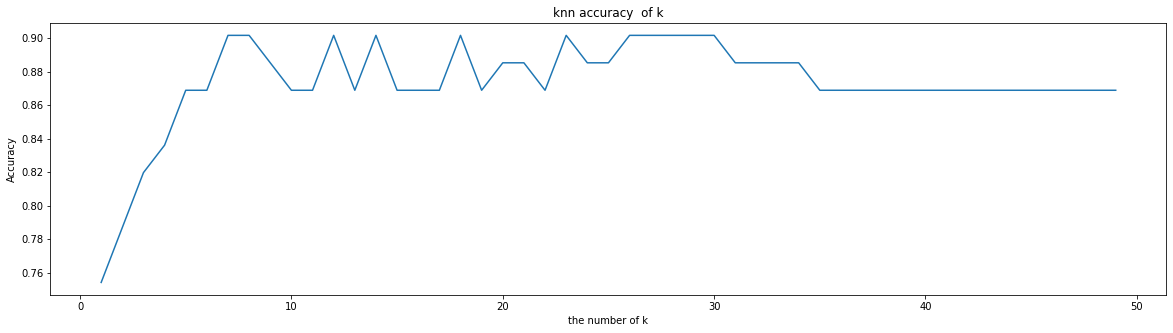

Best k: 6


In [ ]:
# 1~50까지 K값을 순차적으로 입력하여 Best n_neighbors 갯수 확인
score_list = []

for epoch in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=epoch)
    knn.fit(x_train,y_train)
    score_list.append(knn.score(x_test,y_test)) # 각 epoch별 Score를 List에 추가

plt.plot(range(1,50),score_list) # List에 저장된 정확도 값을 시각화
plt.title("knn accuracy  of k")
plt.xlabel("the number of k")
plt.ylabel("Accuracy")
plt.show()
print('Best k:',score_list.index(max(score_list))) # 정확도가 가장 큰 Best K값(n_neighbors) 표시

In [ ]:
# LogisticRegression GridSearch 수행
loreg_param_grid ={ 'C': [1, 3, 5, 7, 9, 11, 13]}
GridSearchCV_df(loreg_param_grid, LogisticRegression(random_state=0), 4 )

Fitting 4 folds for each of 7 candidates, totalling 28 fits
최고 평균 정확도 : 0.7979
{'C': 1}


In [ ]:
# RandomForestClassifier GridSearch 수행
rf_param_grid ={ # rf_param_grid dictionary 선언
    'n_estimators' : [10, 50,100],
    'min_samples_leaf' : [1,4,8],
    'min_samples_split' : [2,3,4]
    }
GridSearchCV_df(rf_param_grid, RandomForestClassifier(random_state=5), 4 )

Fitting 4 folds for each of 27 candidates, totalling 108 fits
최고 평균 정확도 : 0.8060
{'min_samples_leaf': 8, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# DecisionTreeClassifier GridSearch 수행
tree_param_grid ={ 'max_depth' : [5, 10,15],
                   'min_samples_split' : [5,10,15],
                   'min_samples_leaf' : [1,3,5,7]}
GridSearchCV_df(tree_param_grid, DecisionTreeClassifier(random_state=5), 4 )

Fitting 4 folds for each of 36 candidates, totalling 144 fits
최고 평균 정확도 : 0.7150
{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}


In [ ]:
# AdaBoostClassifier GridSearch 수행
ada_param_grid = { 
    'n_estimators':[100,50],
     'learning_rate':[0.05,0.1]}
GridSearchCV_df(ada_param_grid, AdaBoostClassifier(random_state=5), 4 )

Fitting 4 folds for each of 4 candidates, totalling 16 fits
최고 평균 정확도 : 0.8307
{'learning_rate': 0.05, 'n_estimators': 100}


In [ ]:
# LGBMClassifier GridSearch 수행
lgbm_param_grid = {
    'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
    'n_estimators': [20, 40, 60, 80, 100, 120]}
GridSearchCV_df(lgbm_param_grid, LGBMClassifier(random_state=5), 4 )

Fitting 4 folds for each of 30 candidates, totalling 120 fits
최고 평균 정확도 : 0.8020
{'learning_rate': 0.05, 'n_estimators': 40}


In [ ]:
# SVM GridSearch 수행
svm_parameters = {'kernel': ['rbf'], # svm_parameters 선언
                   'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
                   'C': [0.01, 0.1, 1, 10, 100, 1000]}
GridSearchCV_df(svm_parameters, SVC(random_state=5), 4 )

Fitting 4 folds for each of 36 candidates, totalling 144 fits
최고 평균 정확도 : 0.8101
{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
# GridSearch를 통해 나온 하이퍼파라미터 반영하여 Model 생성
loreg= LogisticRegression(C=1,random_state=0)
GNB= GaussianNB()
knn = KNeighborsClassifier(n_neighbors=6)
#rf = RandomForestClassifier(min_samples_leaf=8, min_samples_split= 2, n_estimators= 100, random_state=5)
rf = RandomForestClassifier(random_state=5)
tree = DecisionTreeClassifier(max_depth= 5, min_samples_leaf= 3, min_samples_split= 5, random_state=5)
ada= AdaBoostClassifier(learning_rate=0.05, n_estimators=100, random_state=5)
lgbm = LGBMClassifier(learning_rate= 0.05, n_estimators= 40, random_state=5)
svm = SVC(C= 10, gamma= 0.001, kernel= 'rbf', probability=True, random_state=5)

In [ ]:
# 학습/예측/confusion matrix, 정확도 추출용 함수 호출
loreg_acc = pred_acc_fc('[ LogisticRegression ]', loreg)
GNB_acc = pred_acc_fc('[ GaussianNB ]', GNB)
knn_acc = pred_acc_fc('[ KNeighborsClassifier ]', knn)
rf_acc = pred_acc_fc('[ RandomForestClassifier ]', rf)
tree_acc = pred_acc_fc('[ DecisionTreeClassifier ]', tree)
ada_acc= pred_acc_fc('[ AdaBoostClassifier ]', ada)
lgbm_acc = pred_acc_fc('[ LGBMClassifier ]', lgbm)
svm_acc = pred_acc_fc('[ SVM ]', svm)

[ LogisticRegression ] 

confusion_matrix 
 [[26  4]
 [ 3 28]]
accuracy_score: 0.8852 

[ GaussianNB ] 

confusion_matrix 
 [[26  4]
 [ 4 27]]
accuracy_score: 0.8689 

[ KNeighborsClassifier ] 

confusion_matrix 
 [[28  2]
 [ 6 25]]
accuracy_score: 0.8689 

[ RandomForestClassifier ] 

confusion_matrix 
 [[26  4]
 [ 2 29]]
accuracy_score: 0.9016 

[ DecisionTreeClassifier ] 

confusion_matrix 
 [[23  7]
 [ 3 28]]
accuracy_score: 0.8361 

[ AdaBoostClassifier ] 

confusion_matrix 
 [[26  4]
 [ 2 29]]
accuracy_score: 0.9016 

[ LGBMClassifier ] 

confusion_matrix 
 [[26  4]
 [ 3 28]]
accuracy_score: 0.8852 

[ SVM ] 

confusion_matrix 
 [[26  4]
 [ 2 29]]
accuracy_score: 0.9016 



In [ ]:
# 모델 8개일때 hard/soft voting 함수 (하이퍼 파라미터 반영)
vot8_hard_acc = voting_8model_acc_fc('hard', loreg, GNB, knn, rf, tree, ada, lgbm, svm, weights=[1,1,1,1,1,1,1,1])
vot8_soft_acc = voting_8model_acc_fc('soft', loreg, GNB, knn, rf, tree, ada, lgbm, svm, weights=[1,1,1,1,1,1,1,1])

hard  accuracy_score: 0.9180
soft  accuracy_score: 0.9180


In [ ]:
# 모델 6개일때 hard/soft voting 함수
vot6_hard_acc = voting_6model_acc_fc('hard' ,loreg, GNB, knn, rf, lgbm, svm, weights=[1,1,1,1,1,1])
vot6_soft_acc = voting_6model_acc_fc('soft', loreg, GNB, knn, rf, lgbm, svm, weights=[1,1,1,1,1,1])

hard  accuracy_score: 0.9180
soft  accuracy_score: 0.9180


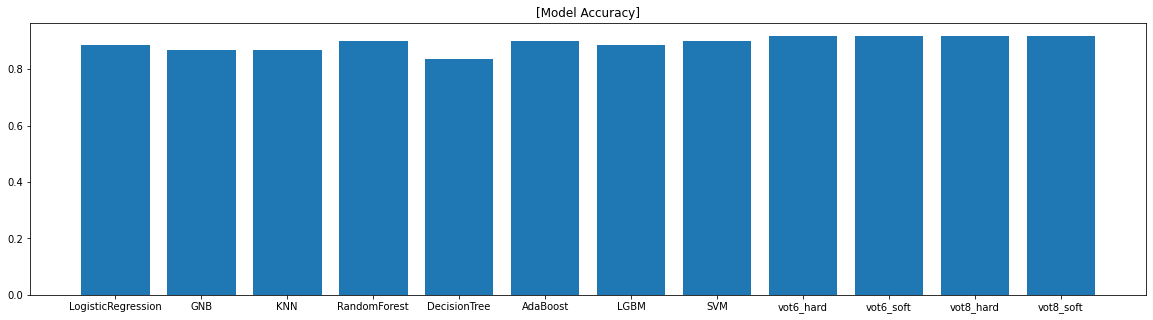

In [ ]:
# 각 모델 및 voting 결과를 시각화(하이퍼 파라미터 적용 전)
visualize_fc()